## Disease Prediction

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Reading the Dataset

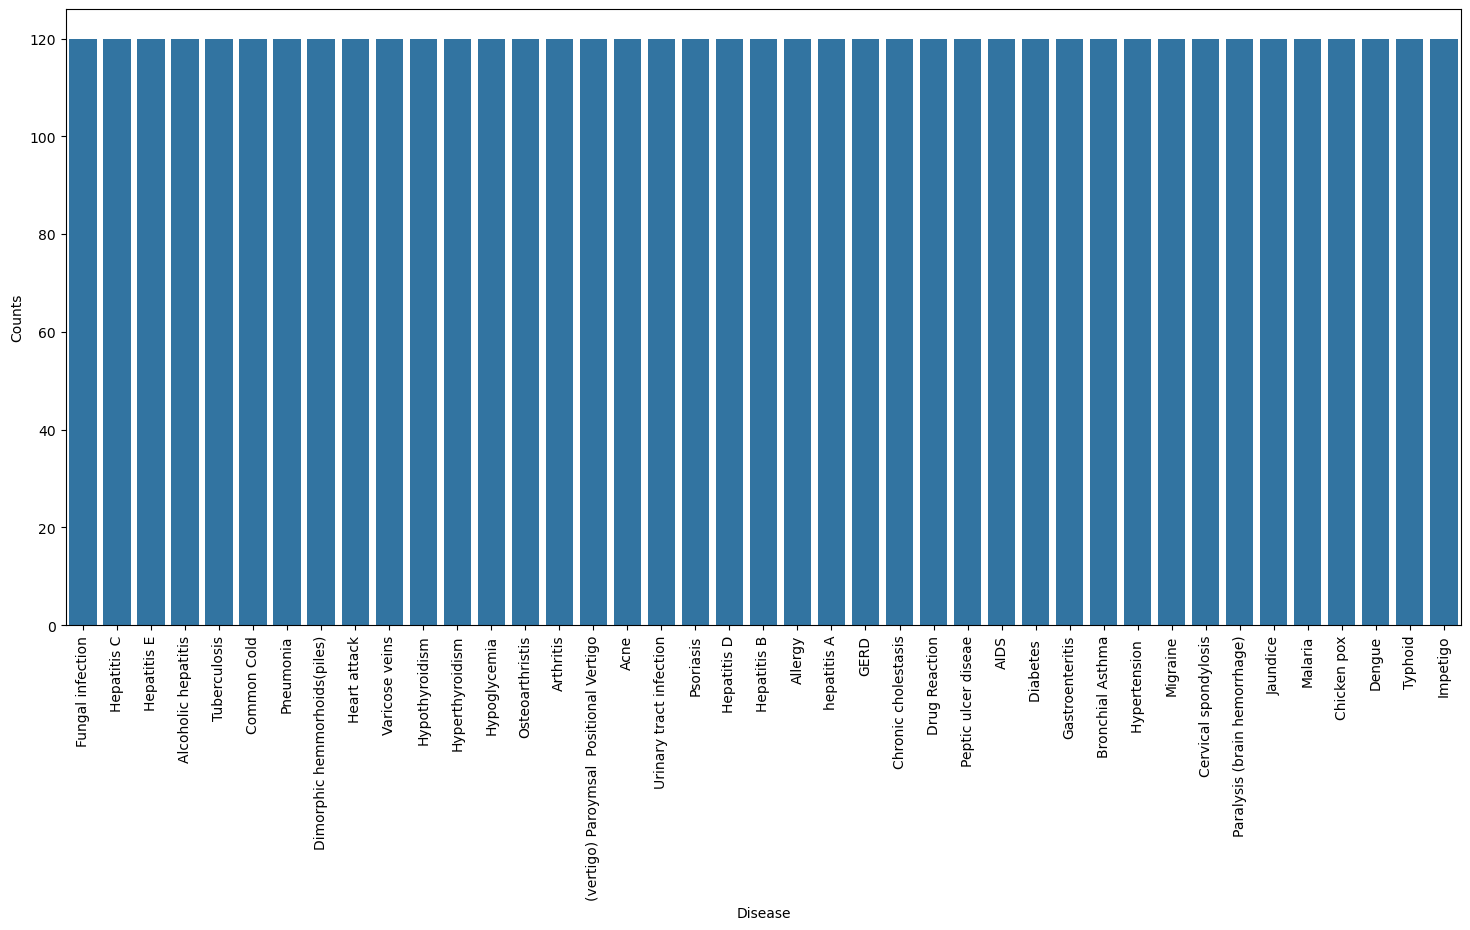

In [2]:
PATH = "../Data/Training.csv"
dataset = pd.read_csv(PATH).dropna(axis=1)

dieseas_counts = dataset["prognosis"].value_counts()
temp_DF = pd.DataFrame(
    {"Disease": dieseas_counts.index, "Counts": dieseas_counts.values}
)

plt.figure(figsize=(18, 8))
sb.barplot(x="Disease", y="Counts", data=temp_DF)
plt.xticks(rotation=90)
plt.show()

### Label encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["prognosis"] = encoder.fit_transform(dataset["prognosis"])

### Spliting the Data to the Training set & Test set

In [4]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


### Using K-Fold Cross-Validation for model selection 

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))


models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18),
}


for m in models:
    model = models[m]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)

    print(m)
    print(scores)
    print(np.mean(scores))

SVC
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
Gaussian NB
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
Random Forest
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


### Building robust classifier by combining all models

100.0
100.0


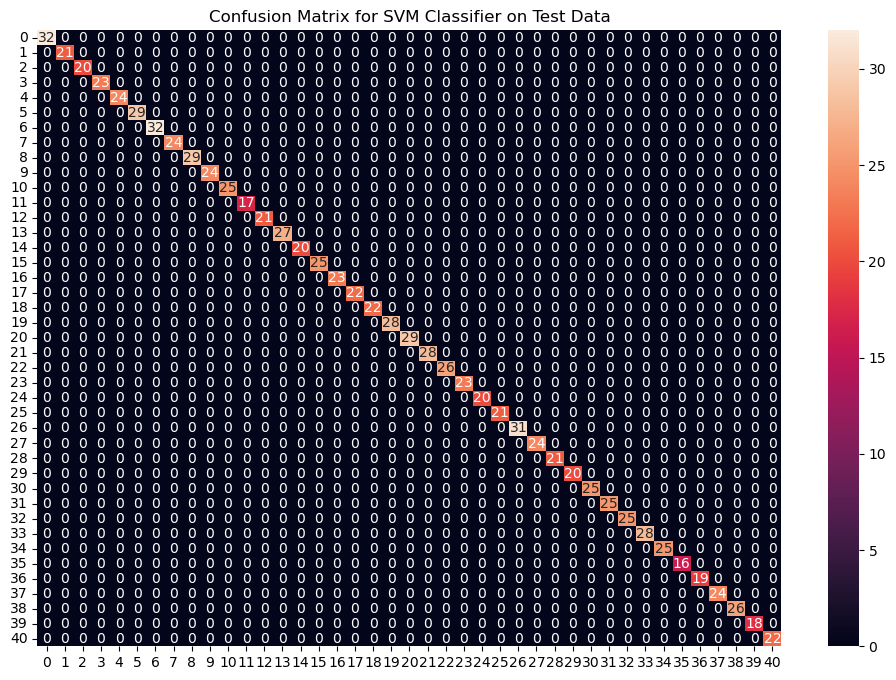

100.0
100.0


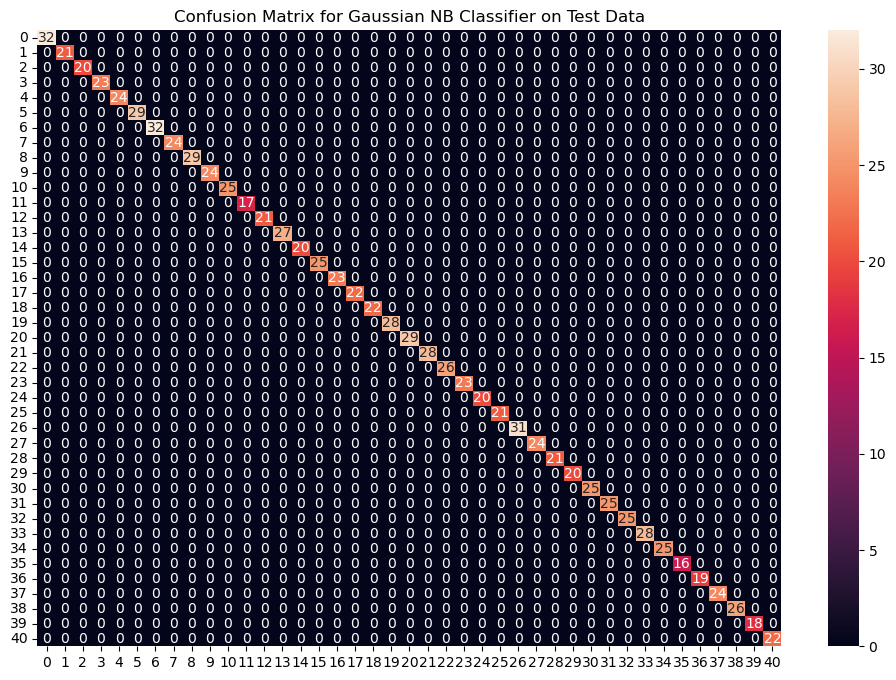

100.0
100.0


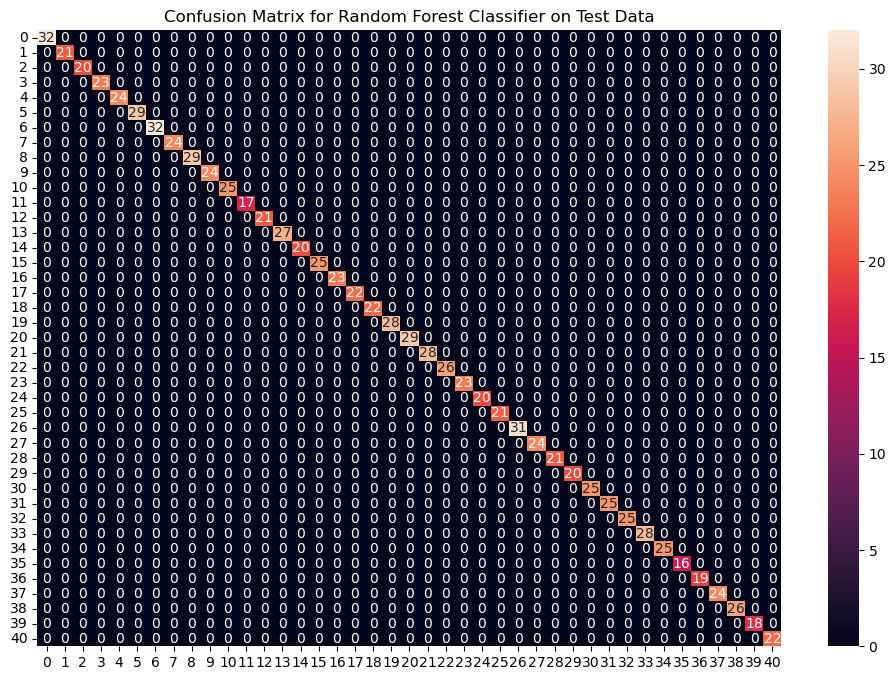

In [19]:
from sklearn.metrics import confusion_matrix

# SVC
svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

print(accuracy_score(y_train, svm.predict(X_train)) * 100)
print(accuracy_score(y_test, pred) * 100)

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
sb.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

print(accuracy_score(y_train, gnb.predict(X_train)) * 100)
print(accuracy_score(y_test, pred) * 100)

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
sb.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Gaussian NB Classifier on Test Data")
plt.show()

# Random Forest
rf = RandomForestClassifier(random_state=18)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(accuracy_score(y_train, rf.predict(X_train)) * 100)
print(accuracy_score(y_test, pred) * 100)

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
sb.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()